# <center> NMF based Faces Representation </center>

We will use the <b>ORL database</b>, available to anyone on <a href="http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html"> AT&T’s web site</a>. This database contains images showing the faces of 40 people. Each one of them was photographed 10 times. These photos are stored as images in grey levels with 112x92 pixels. In our example, we constructed a <b>catalog called orlfaces</b>, comprised of the catalogs named $s_1, s_2, . . . , s_{40}$, each one of them containing the 10 images we are going to process. The data has been split in two parts train and test. For each catalog we use the first 9 photos for training and the last photo for test.

To avoid too large values, the data matrix is divided by max value present in all the images. Indeed, this division does not have any major impact on performance of the Matrix Factorization methods. The data has been split in two-parts train and test. For each catalog we use the first 9 photographs for training and the last photograph for test. However, we only use the training part for this lab. The final data matrix shape is given 10304 (pixels) x 360 (faces)

In [82]:
import numpy as np
import PIL.Image as img
import matplotlib.pyplot as plt
import matplotlib
from numpy import linalg as LA

matplotlib.rcParams['figure.figsize'] = (17.0, 5.0)
matplotlib.rcParams['font.size'] = 15

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1- Load the training data?

In [83]:
import orlfaces
trainData, trainlabels = orlfaces.loadDataTrain("orl_faces")
trainData = trainData / np.max(trainData[:])

2- Display image example?

In [84]:
B = np.array([-1,0,-2,1,2,3])
B = np.clip(B, a_min=0, a_max=None)
print(B)

[0 0 0 1 2 3]


trainData[:,  180 ] : label :  0
(10304, 360)


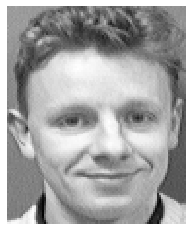

In [85]:
i = np.random.randint(trainData.shape[1])
print("trainData[:, ", i, "] : label : ",  trainlabels[i])
orlfaces.showFaces(trainData[:, i])
print(trainData.shape)

3- Create the NMF function? 

In [38]:
#On va utiliser les relations vu dans le cours pour converger. On peut aussi faire un descente de gradient.

def NMF(V, RANK, MAX_ITER=50, LAMBDA=0.0001):
    # NMF - Non-negative matrix factorization
    # B, W, OBJ, NUM_ITER = NMF(V, RANK, MAX_ITER, LAMBDA)
    # V         : Input data.
    # RANK      : Rank size.
    # MAX_ITER  : Maximum number of iterations (default 50).
    # LAMBDA    : Convergence step size (default 0.0001). 
    # B         : Set of basis images.
    # W         : Set of basis coefficients.
    # OBJ       : Objective function output.
    # NUM_ITER  : Number of iterations run.

    # Create initial matrices random initialization
    # Make sure W has unit sum columns! (each column should sum to one).
    
    print(V.shape)
    W = np.random.rand(RANK, V.shape[1])
    W = np.apply_along_axis(lambda t : t/t.sum(), 0, W)
    #print(W.sum(axis=0))
    print(W.shape)
    B = np.random.rand(V.shape[0], RANK)
    print(B.shape)
   
  
    # Calculate initial objective
    OBJ = computeObjective(V, B, W)
    # Iterations
    NUM_ITER = 0
    for i in range(MAX_ITER):
        NUM_ITER += 1
        B = B*( ((V/(B@W)) @ W.T) / (np.ones( (1,W.T.shape[0]) ) @ W.T))
        B = np.clip(B, a_min=0, a_max=None)
        W = W*( (B.T @ (V/(B@W))) / (B.T @ np.ones( (B.T.shape[1],1) )))
        W = np.clip(W, a_min=0, a_max=None)

                   
        new_OBJ = computeObjective(V, B, W)
        print(np.abs(new_OBJ - OBJ))
        if np.abs(new_OBJ - OBJ) < LAMBDA:
            break
        OBJ = new_OBJ
        

    # Stop when the absolute value of the new objective function
    # value – old objective value is smaller or equal to Lambda or
    # the max number of iterations is yield.
    
    return B, W, OBJ, NUM_ITER

def computeObjective(V, B, W):
    obj = np.sum(np.sum(-V * np.log(np.abs(B @ W)) - (B @ W)))
    return obj

- As seen in the lecture for the KL divergence

    - Start iteration
    $$ B = B \otimes \frac{\left(\frac{V}{BW}\right)W^T}{\mathbb{1}W^T} $$
    $$ W = W \otimes \frac{B^T\left(\frac{V}{BW}\right)}{B^T\mathbb{1}} $$

The division is elements by element.

$\otimes$ The multiplication is elements by elements

4- Compute the NMF using this script?

(10304, 360)
(40, 360)
(10304, 40)
261745.02806810883
244.1125242203707
243.84506069874624
248.92619812459452
259.55059319356224
276.2928717173054
299.98210604535416
331.7056300851982
372.8050035001943
424.8514579067123
489.5827167457319
568.776795652986
664.0332412896678
776.4325499043334
906.0576828362537
1051.3978214262752
1208.7225300343707
1371.6113126780256
1530.918209141586
1675.4730914557003
1793.678126318613
1875.8054918562993
1916.3475023705396
1915.4972754002665
1879.0418394048465
1816.6360533316038
1739.1927933318657
1656.4537612441345
1575.518819734105
1500.501592857996
1432.9882060806267
1372.826462578203
1318.8913448976236
1269.6682328101015
1223.635721853003
1179.4880520486622
1136.2433457409497
1093.2730984974187
1050.2786210500635
1007.23480010411
964.3182806122932
921.8336755135097
880.1471688376623
839.6325991059421
800.6316543900175
763.4275712692761
728.2305901803775
695.1730062329443
664.311608100892
635.635398384009
609.0766570084379
584.5236397833796
561.833503

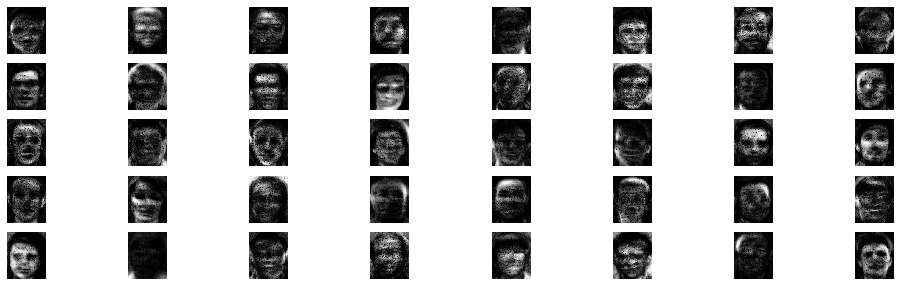

In [6]:
#On n'obtient pas des bouts de visage car les données ne sont pas normalisées (prise toute de la même façon).

B, W, obj, k = NMF(trainData, 40, 100, 0.001)
print("Iteration", k)

for k in range(40):
    plt.subplot(5, 8, k + 1)
    orlfaces.showFaces(B[:, k]);

5- Compare your results to the NMF predefined function in python sklearn.decomposition.NMF?

In [7]:
from sklearn.decomposition import NMF

model = NMF(n_components = 40, init='random', random_state=0, solver='mu', beta_loss='kullback-leibler', max_iter = 500)
W1 = model.fit_transform(trainData.T)
B1 = model.components_

/home/mados/.local/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1069: ConvergenceWarning: Maximum number of iteration 500 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(360, 40)
(40, 10304)


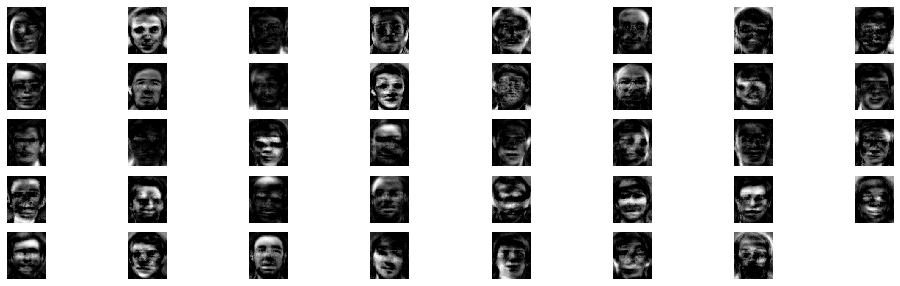

In [8]:
print(W1.shape)
print(B1.shape)

for k in range(1,40):
    plt.subplot(5, 8, k)
    orlfaces.showFaces(B1.T[:, k]);

6- Sparsity: Imposing sparsity to both B and W will generate the following updating rules.

$$ B = B \otimes \frac{\left(\frac{V}{BW}\right)W^T}{\mathbb{1}W^T + \beta} $$
$$ W = W \otimes \frac{B^T\left(\frac{V}{BW}\right)}{B^T\mathbb{1} + \alpha} $$

In [9]:
def ssnmf(V, RANK, MAX_ITER, LAMBDA, ALPHA, BETA): 
    # NMF - Non-negative matrix factorization
    # W, H, OBJ, NUM_ITER] = SSNMF(V,RANK,MAX_ITER,LAMBDA)
    # V - Input data.
    # RANK - Rank size.
    # MAX_ITER - Maximum number of iterations (default 50).
    # LAMBDA - Convergence step size (default 0.0001).
    # ALPHA - Sparse coefficient for W.
    # BETA - Sparse coefficient for B.
    # W - Set of basis images.
    # H - Set of basis coefficients.
    # OBJ - Objective function output.
    # NUM_ITER - Number of iterations run.
    
    W = np.random.rand(RANK, V.shape[1])
    W = np.apply_along_axis(lambda t : t/t.sum(), 0, W)
    #print(W.sum(axis=0))
    print(W.shape)
    B = np.random.rand(V.shape[0], RANK)
    print(B.shape)
   
  
    # Calculate initial objective
    OBJ = computeObjective(V, B, W)
    # Iterations
    NUM_ITER = 0
    for i in range(MAX_ITER):
        NUM_ITER += 1
        B = B*( ((V/(B@W)) @ W.T) / (np.ones( (1,W.T.shape[0]) ) @ W.T + BETA))
        B = np.clip(B, a_min=0, a_max=None)
        W = W*( (B.T @ (V/(B@W))) / (B.T @ np.ones( (B.T.shape[1],1) ) + ALPHA))
        W = np.clip(W, a_min=0, a_max=None)

                   
        new_OBJ = computeObjective(V, B, W)
        print(np.abs(new_OBJ - OBJ))
        if np.abs(new_OBJ - OBJ) < LAMBDA:
            break
        OBJ = new_OBJ
        

    # Stop when the absolute value of the new objective function
    # value – old objective value is smaller or equal to Lambda or
    # the max number of iterations is yield.
    
    return B, W, OBJ, NUM_ITER


The new objective function is

In [10]:
def compute_objective(V, W, B, alpha, beta):
    obj = np.sum(np.sum(-V * np.log(W @ B) - (W @ B))) + alpha * np.sum(np.sum(B))+ beta * np.sum(np.sum(W));
    return obj

7- Compute the sparse NMF for $\alpha=1$ and $\beta=100$? 

(40, 360)
(10304, 40)
273009.07492750767
7676.671857500158
7589.956434362743
7460.0664419899695
7290.9838153591845
7084.963964257622
6844.251508012065
6571.123705031874
6267.812572369818
5936.440066072333
5579.008853258216
5197.483122527774
4793.992669666477
4371.1844071839005
3932.717704382085
3483.8431093965773
3031.9151974498527
2586.5896545059513
2159.4012102636625
1762.5043373811059
1406.6496708100312
1098.9064601080609
840.9842291195528
628.9506421074038
454.5911270782235
307.8914340068004
179.63271811039886
63.16261148051126
45.07240694045322
146.05281525762985
239.24104382190853
323.6253216494806
398.4285586423357
463.42146716068964
518.9509405358694
565.8358239204972
605.2358962664148
638.5345478941454
667.2353440881707
692.8645054411027
716.8798030561884
740.594107064011
765.122329411679
791.3561431924463
819.9649373543798
851.4158557701157
886.0023524367716
923.8708371848916
965.0380530877155
1009.3947246347088
1056.6880696198787
1106.4582747179666
1157.8577841064543
1209.17

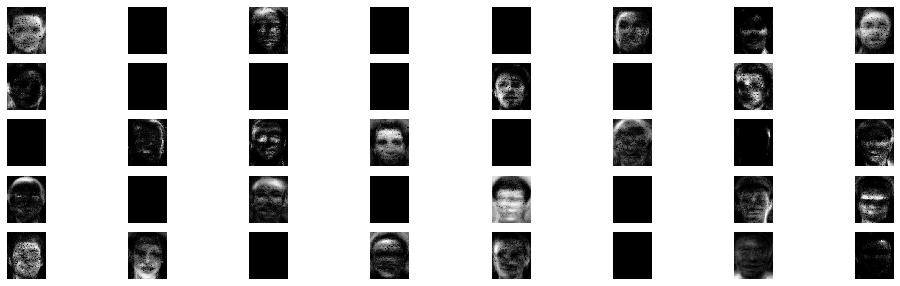

In [11]:
#On remarque que c'est sparse, c'est ce qu'on voulait avec ces coefficients qui jouent sur les contraintes du PL.

B, W, obj, k = ssnmf(trainData, 40, 100, 0.001, 1, 100)
print("Iteration", k)

for k in range(40):
    plt.subplot(5, 8, k + 1)
    orlfaces.showFaces(B[:, k]);

In [95]:
#Remarque on peut aussi utiliser une descente de gradient plutot que la relation du dessus pour converger.

def error_l1_l2(R, P, Qt, beta, gamma):
    return (np.linalg.norm(R - P @ Qt) + 
            beta*LA.norm(P, 1) + beta*LA.norm(Qt, 1) + 
            gamma*np.linalg.norm(P) + gamma*np.linalg.norm(Qt))

def update_P_l1_l2(R, P, Qt, alpha, beta, gamma):
    P += alpha *  (2 * (R - P @ Qt) @ Qt.T - beta - 2*gamma*P) # Differentielle
    return P
  
def update_Q_l1_l2(R, P, Qt, alpha, beta, gamma):
    Q = Qt.T
    Q += alpha * (2 * (R - P @ Qt).T @ P - beta - 2 * gamma*Q) # La meme differentielle
    return Q
        
def matrix_factorization_l1_l2(R, P, Q, K, steps=50, alpha=0.0002, beta=0.03, gamma=0.02, es=None):
    for k in range(steps):
        Q = update_Q_l1_l2(R, P, Q.T, alpha, beta, gamma)
        np.clip(Q, a_min=0, a_max=None)
        P = update_P_l1_l2(R, P, Q.T, alpha, beta, gamma)
        np.clip(P, a_min=0, a_max=None)
        if es is not None:
            es.append(error_l1_l2(R,P,Q.T, beta, gamma))
    return P, Q

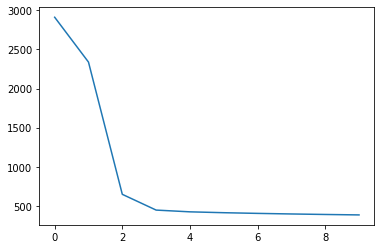

In [100]:
es = list()
N,M = trainData.shape
K = 5 #Rank
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
nP, nQ = matrix_factorization_l1_l2(trainData, P, Q, K, steps=10,  alpha=1e-4, beta=0, gamma=0, es=es)
#nR = np.dot(nP, nQ.T)
plt.plot(es)
